# Fire Department Calls for Service

Fire Calls-For-Service includes all fire units responses to calls. Each record includes the call number, incident number, address, unit identifier, call type, and disposition. All relevant time intervals are also included. Because this dataset is based on responses, and since most calls involved multiple units, there are multiple records for each call number. Addresses are associated with a block number, intersection or call box, not a specific address.

Data Source : https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Fire_Department_Calls_for_Service.csv')

C:\Users\tongd_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951258 entries, 0 to 4951257
Data columns (total 45 columns):
Call Number                                     int64
Unit ID                                         object
Incident Number                                 int64
Call Type                                       object
Call Date                                       object
Watch Date                                      object
Received DtTm                                   datetime64[ns]
Entry DtTm                                      object
Dispatch DtTm                                   object
Response DtTm                                   object
On Scene DtTm                                   datetime64[ns]
Transport DtTm                                  object
Hospital DtTm                                   object
Call Final Disposition                          object
Available DtTm                                  object
Address                                         

In [3]:
df.shape

(4951258, 43)

Set the date to datatime type

In [13]:
df['Received DtTm'] = pd.to_datetime(df['Received DtTm'])

In [101]:
df['Received DtTm'].min()

Timestamp('2000-04-12 21:00:29')

In [49]:
df['On Scene DtTm'] = pd.to_datetime(df['On Scene DtTm'])

In [ ]:
df['Received hr'] = df['Received DtTm'].dt.hour

Find out which call type is the most popular by hours

In [22]:
Calltype = df.groupby(['Call Type','Received hr'])['Incident Number'].count().sort_values(ascending=False).unstack(level=-1)

In [23]:
Calltype.fillna(0,inplace = True)

In [32]:
Calltype['Total']=Calltype.sum(axis =1, skipna = True)

In [38]:
Calltype_top5 = Calltype.sort_values(by='Total',ascending=False).head()

In [42]:
Calltype_top5.drop(['Total'],axis=1,inplace = True)

Time distribution of top 5 popular call types

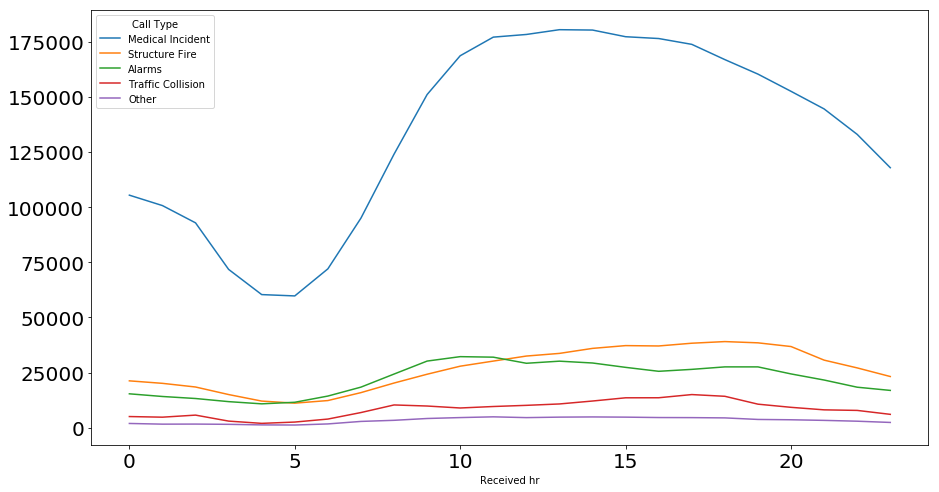

In [81]:
Calltype_top5.transpose().plot(figsize=(15,8),fontsize=14)

In [69]:
df['RS_time'] = np.abs(-df['On Scene DtTm'].dt.minute+df['Received DtTm'].dt.minute)

In [73]:
dfRS = df.dropna(subset = ['RS_time'])

The average time between call received to on scene time for top 10 categories.

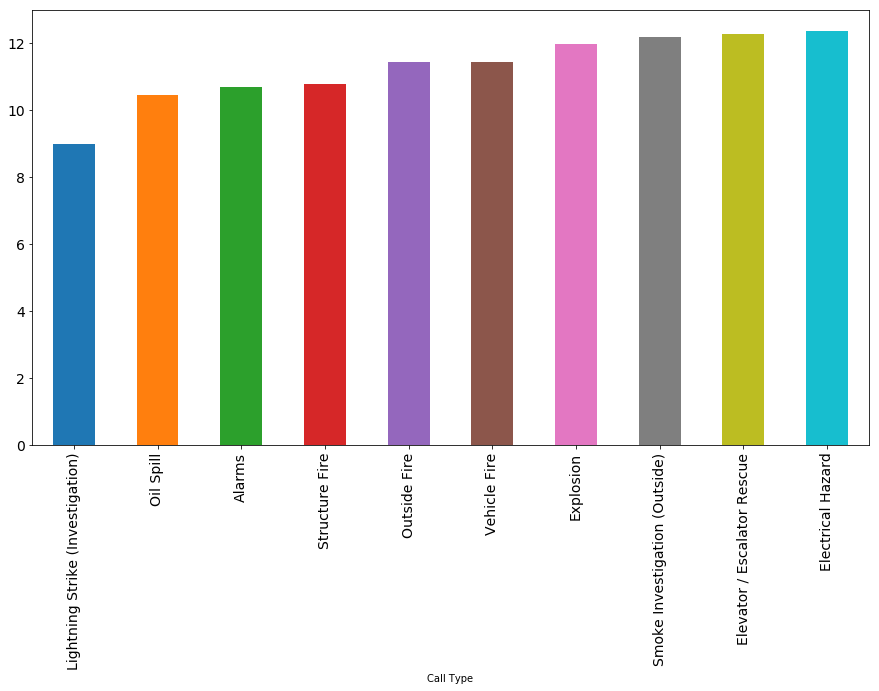

In [82]:
dfRS.groupby(['Call Type'])['RS_time'].mean().sort_values().head(10).plot(kind='bar',figsize=(15,8),fontsize=14)

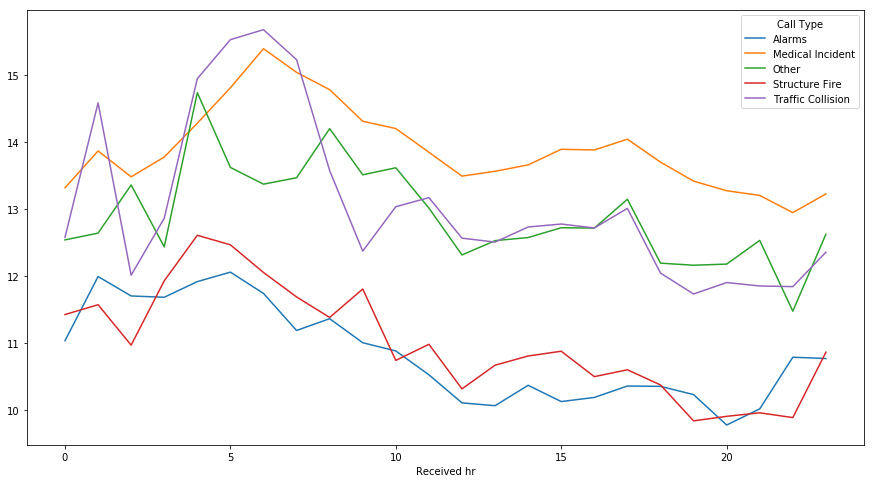

In [100]:
dfRS[dfRS['Call Type'].isin(['Medical Incident','Alarms','Other','Traffic Collision','Structure Fire'])].groupby(['Call Type','Received hr'])['RS_time'].mean().unstack(level=-1).transpose().plot(figsize=(15,8))

In [102]:
dfRS[dfRS['Call Type'].isin(['Medical Incident','Alarms','Other','Traffic Collision','Structure Fire'])].groupby(['Call Type','Received hr'])['RS_time'].mean().unstack(level=-1)

Received hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Call Type,,,,,,,,,,,,,,,,,,,,,
Alarms,11.032897,11.992533,11.702093,11.682796,11.916889,12.058472,11.740183,11.186223,11.362142,11.002862,...,10.366167,10.122968,10.184469,10.355352,10.350478,10.226901,9.771982,10.013316,10.786059,10.766679
Medical Incident,13.319099,13.871017,13.483265,13.779951,14.286113,14.815753,15.400076,15.046642,14.787234,14.314880,...,13.662096,13.895653,13.885895,14.046427,13.703958,13.419391,13.276035,13.205674,12.948333,13.228406
Other,12.540595,12.641975,13.361934,12.436441,14.742268,13.624027,13.374317,13.469747,14.204452,13.514342,...,12.575953,12.722784,12.717239,13.148698,12.192910,12.161845,12.178868,12.532918,11.474723,12.625428
Structure Fire,11.424258,11.571279,10.966960,11.928594,12.609533,12.467121,12.053400,11.687358,11.381221,11.805794,...,10.804327,10.875665,10.495722,10.598196,10.371609,9.834586,9.902199,9.954871,9.883190,10.861323
Traffic Collision,12.579203,14.589181,12.012770,12.865268,14.951705,15.535227,15.684265,15.235259,13.576481,12.373330,...,12.733641,12.777868,12.719011,13.011796,12.044622,11.731527,11.902652,11.851700,11.841704,12.356500
